# Single sample scATAC-seq pipeline with snapATAC2

In [1]:
# Imports
import os
import time
import logging
import argparse
from tqdm.auto import tqdm
import snapatac2 as snap

In [2]:
# Define paths
frag_file = "/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/processed/23Oct23/chromap/MM168/aln.bed"
#out_file = "/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/annotation/23Oct23/MM168/snap.h5ad"
min_tsse = 4
sorted_by_barcode = False
min_num_fragments = 1000
low_memory = False

In [3]:
# Load in from fragment file
adata = snap.pp.import_data(
    fragment_file=frag_file,
    genome=snap.genome.hg38,
    min_tsse=min_tsse,
    min_num_fragments=min_num_fragments,
    #file=out_file,
    sorted_by_barcode=sorted_by_barcode,
    chunk_size=100000,
    low_memory=low_memory,
)

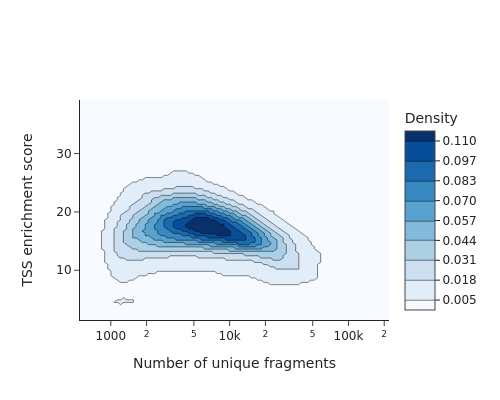

In [5]:
snap.pl.tsse(adata, interactive=False)

In [6]:
snap.pp.filter_cells(adata, min_tsse=12, min_counts=2000, max_counts=50000)

In [7]:
snap.pp.add_tile_matrix(adata, bin_size=5000)

In [8]:
snap.pp.select_features(adata, n_features=50000)

2023-10-23 21:29:35 - INFO - Selected 50000 features.


In [9]:
snap.pp.scrublet(adata)

In [10]:
snap.pp.filter_doublets(adata)

2023-10-23 21:37:07 - INFO - Detected doublet rate = 6.432%


In [11]:
adata

AnnData object with n_obs × n_vars = 6081 × 606219
    obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito', 'doublet_probability', 'doublet_score'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'scrublet_sim_doublet_score'
    obsm: 'insertion'

In [12]:
adata.write("/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/annotation/23Oct23/MM168/snap_mem.h5ad")

In [14]:
adata.obsm["insertion"]

<6081x3088269832 sparse matrix of type '<class 'numpy.uint8'>'
	with 92461477 stored elements in Compressed Sparse Row format>

In [18]:
adata

AnnData object with n_obs × n_vars = 6081 × 606219
    obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito', 'doublet_probability', 'doublet_score'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'scrublet_sim_doublet_score'
    obsm: 'insertion'